In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk

nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords list
nltk.download('averaged_perceptron_tagger')  # Part-of-Speech Tagger
nltk.download('wordnet')  # Lemmatizer
nltk.download('maxent_ne_chunker')  # Named Entity Recognition
nltk.download('words')  # Named Entity Recognition

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiaoh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiaoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\xiaoh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xiaoh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\xiaoh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\xiaoh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-

True

**Convert docx to txt**

In [2]:
import re
from pathlib import Path
import docx2txt
from collections import Counter

# List of DOCX files representing 6 continents
docx_files = [
    'AGGA_Africa.docx',
    'AGGA_Asia.docx',
    'AGGA_Europe.docx',
    'AGGA_NorthAmerica.docx',
    'AGGA_SouthAmerica.docx',
    'AGGA_Oceania.docx',
]

# Function to process each DOCX file
def process_docx(doc_path):
    # Convert docx to plain text
    text = docx2txt.process(doc_path)
    
    # Create the corresponding TXT file path
    txt_path = doc_path.replace('.docx', '.txt')
    
    # Save the text to a .txt file with encoding 'utf-8'
    Path(txt_path).write_text(text, encoding='utf-8')
    
    # Output the path of the saved .txt file
    print({txt_path})

# Process each DOCX file
for docx_file in docx_files:
    process_docx(docx_file)

{'AGGA_Africa.txt'}
{'AGGA_Asia.txt'}
{'AGGA_Europe.txt'}
{'AGGA_NorthAmerica.txt'}
{'AGGA_SouthAmerica.txt'}
{'AGGA_Oceania.txt'}


**SECTION TOKENIZING, STEMMING, AND LEMMATIZATION**

In [3]:
# List of text files to process for continents
txt_files = [
    'AGGA_Africa.txt',
    'AGGA_Asia.txt',
    'AGGA_Europe.txt',
    'AGGA_NorthAmerica.txt',
    'AGGA_SouthAmerica.txt',
    'AGGA_Oceania.txt'
]

In [4]:
# Function to process each text file
def process_txt(txt_path):
    # Read the content from the saved txt file
    with open(txt_path, 'r', encoding='utf-8') as file:
        text_content = file.read().lower()  # Convert text to lowercase immediately after reading   
    
    # Remove symbols, newline characters, and numbers
    text_content = re.sub(r'[^\w\s]', '', text_content)  # Removes symbols
    text_content = re.sub(r'[\n\t]', ' ', text_content)  # Replaces newline and tab characters with spaces
    text_content = re.sub(r'\d+', '', text_content)  # Removes numbers
    
    # Tokenization into sentences
    sentences = sent_tokenize(text_content)

    # Tokenization into words
    words = word_tokenize(text_content)

    # Removing stopwords, filtering out common words that do not contribute much meaning to the sentences.
    default_stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in default_stop_words]

    # Stemming, reducing words to their base or root form.
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Lemmatization, ensures the root word (lemma) is a valid word
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return filtered_words

**1.1. The Frequency of Keywords after removing irrelevant words in 6 different continents: top 10 for each**

ai, Frequency: 751
chatgpt, Frequency: 345
tools, Frequency: 258
generative, Frequency: 251
students, Frequency: 239
learning, Frequency: 196
research, Frequency: 185
information, Frequency: 148
data, Frequency: 136
academic, Frequency: 122
prompt, Frequency: 118
language, Frequency: 102
writing, Frequency: 100
generate, Frequency: 93
model, Frequency: 91
questions, Frequency: 87
teaching, Frequency: 83
example, Frequency: 78
knowledge, Frequency: 77
student, Frequency: 75


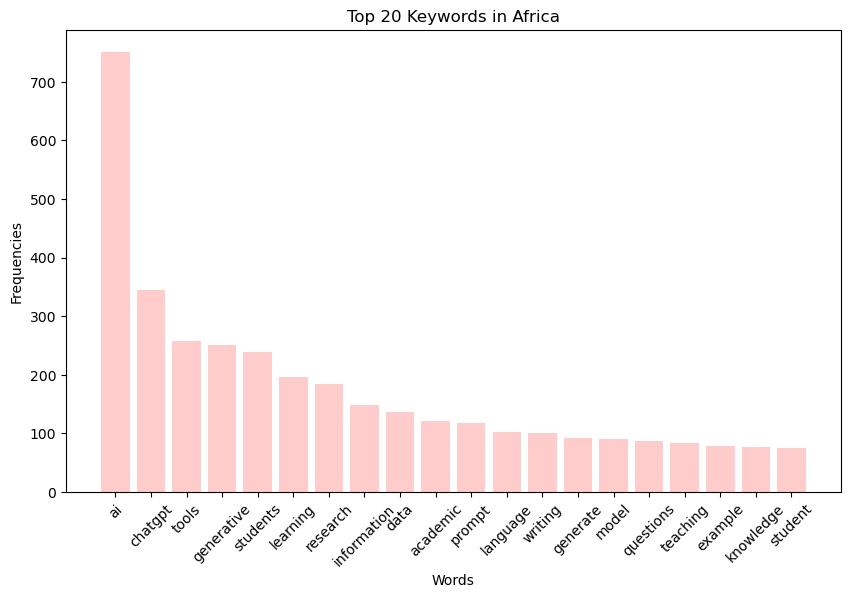

ai, Frequency: 798
generative, Frequency: 372
research, Frequency: 311
students, Frequency: 275
tools, Frequency: 258
data, Frequency: 202
learning, Frequency: 147
scientific, Frequency: 139
academic, Frequency: 118
review, Frequency: 99
results, Frequency: 96
information, Frequency: 94
content, Frequency: 92
technology, Frequency: 91
chatgpt, Frequency: 88
intelligence, Frequency: 77
artificial, Frequency: 76
teaching, Frequency: 64
ethics, Frequency: 60
course, Frequency: 59


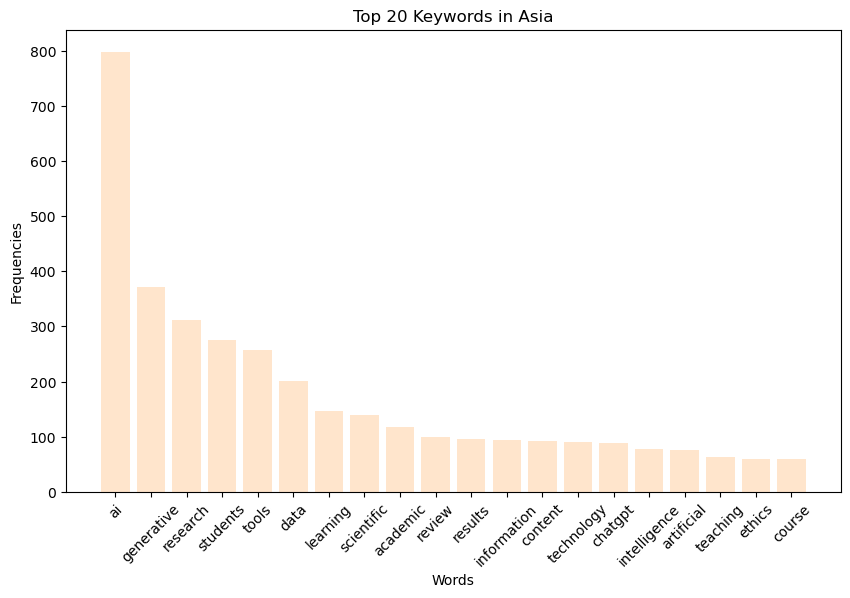

ai, Frequency: 618
tools, Frequency: 263
students, Frequency: 234
generative, Frequency: 198
learning, Frequency: 116
data, Frequency: 102
information, Frequency: 89
teaching, Frequency: 85
assessment, Frequency: 85
academic, Frequency: 84
language, Frequency: 73
chatgpt, Frequency: 68
student, Frequency: 65
education, Frequency: 60
content, Frequency: 57
gpt, Frequency: 56
questions, Frequency: 54
support, Frequency: 53
chatbots, Frequency: 52
example, Frequency: 51


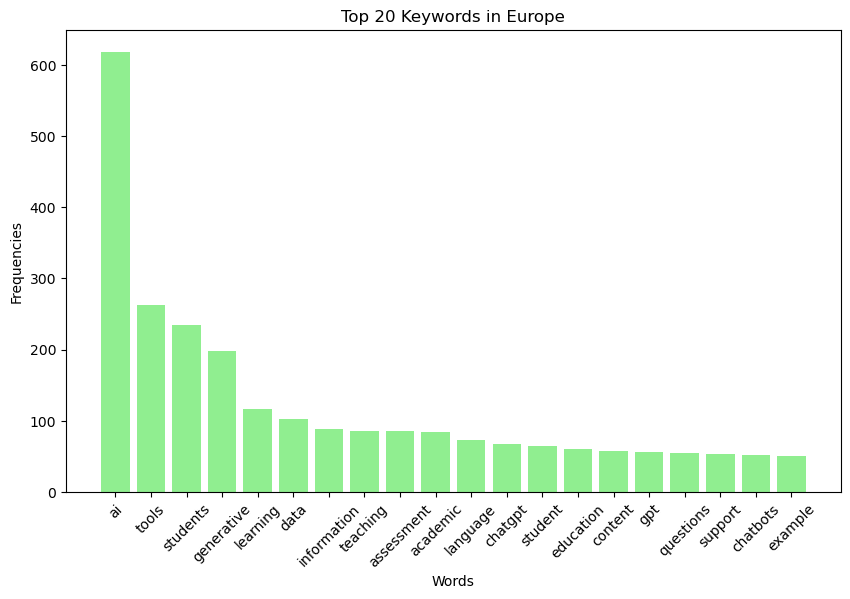

ai, Frequency: 1064
students, Frequency: 486
tools, Frequency: 357
learning, Frequency: 324
generative, Frequency: 241
teaching, Frequency: 199
teachers, Frequency: 177
chatgpt, Frequency: 171
student, Frequency: 163
data, Frequency: 158
models, Frequency: 132
course, Frequency: 124
systems, Frequency: 121
information, Frequency: 119
educational, Frequency: 118
education, Frequency: 117
instructors, Frequency: 109
academic, Frequency: 107
technology, Frequency: 100
example, Frequency: 97


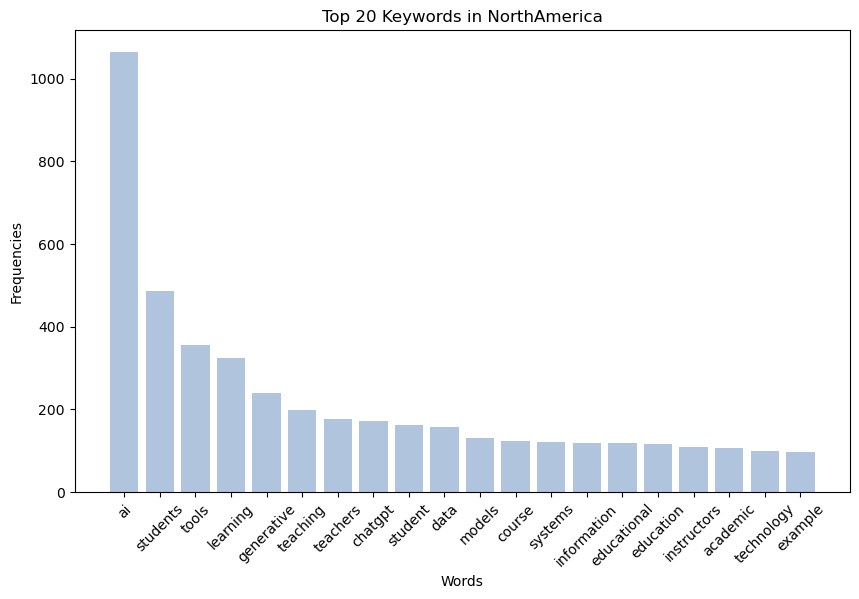

ai, Frequency: 366
data, Frequency: 153
research, Frequency: 109
artificial, Frequency: 107
intelligence, Frequency: 106
public, Frequency: 104
judicial, Frequency: 97
tools, Frequency: 96
digital, Frequency: 90
information, Frequency: 88
development, Frequency: 82
systems, Frequency: 78
guidelines, Frequency: 76
national, Frequency: 74
ethical, Frequency: 69
system, Frequency: 65
justice, Frequency: 59
cases, Frequency: 59
generative, Frequency: 58
example, Frequency: 57


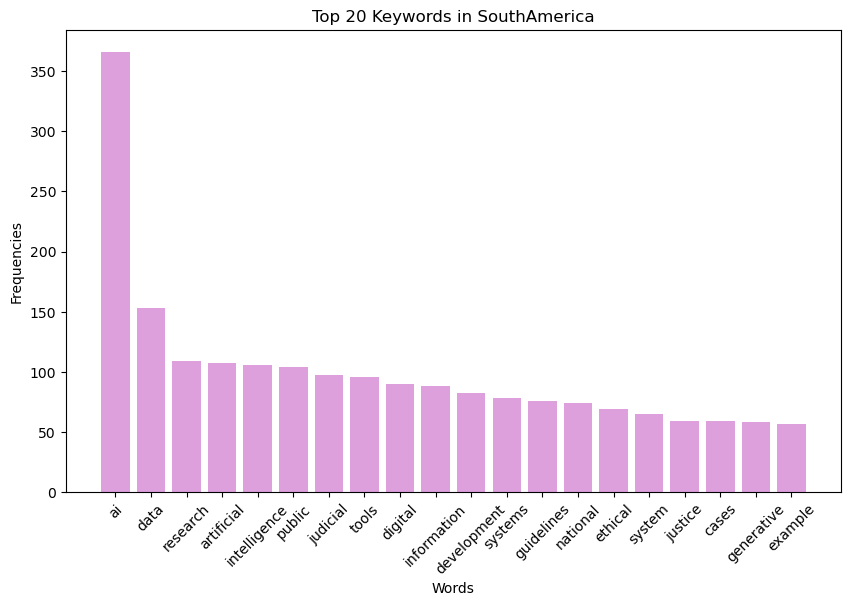

generative, Frequency: 51
ai, Frequency: 51
tools, Frequency: 37
framework, Frequency: 23
support, Frequency: 20
course, Frequency: 19
learning, Frequency: 18
australian, Frequency: 16
schools, Frequency: 13
students, Frequency: 13
information, Frequency: 13
assessment, Frequency: 13
director, Frequency: 13
data, Frequency: 12
content, Frequency: 11
education, Frequency: 11
communities, Frequency: 11
privacy, Frequency: 10
academic, Frequency: 9
copilot, Frequency: 9


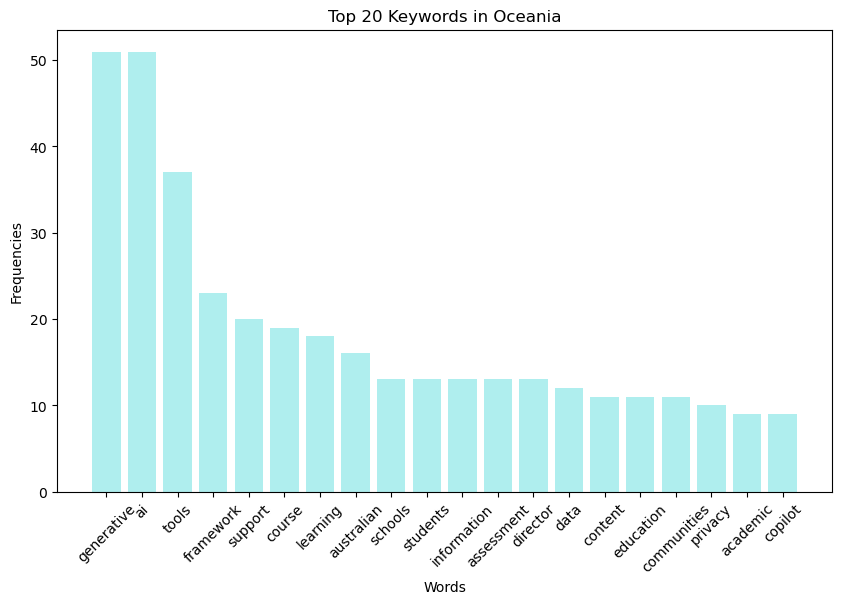

In [5]:
# Define additional stopwords, CAN BE MODIFIED TO EXCLUDE ADDITONAL WORDS
added_stopwords = {'use', 'used', 'using', 'may', 'work', 'also', 'text', 'ways',
                   'uio', "tool", "university", "provide", "relevant","different",
                   "genai","school","allowed"}

# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english')).union(added_stopwords)

# Generate a list of chart colors
chart_colors = [
    '#FFCCCC', '#FFE5CC', '#90EE90', '#B0C4DE', '#DDA0DD', '#AFEEEE'
]


# Function to plot frequency chart
def plot_frequency_chart(words, title, color):
    # Filter out the stopwords
    filtered_words = [word for word in words if word not in all_stopwords]
    
    counter = Counter(filtered_words)
    most_common = counter.most_common(20)
    
    # Print each word and its frequency count
    for word, frequency in most_common:
        print(f'{word}, Frequency: {frequency}')
    
    words, frequencies = zip(*most_common)

    colors = chart_colors[:len(words)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color=color)
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title(f'Top 20 Keywords in {title}')
    plt.xticks(rotation=45)
    plt.show()

# Process each text file and create frequency chart
all_filtered_words = {}

for i, txt_file in enumerate(txt_files):
    filtered_words = process_txt(txt_file)
    
    continent_name = txt_file.split('_')[1].replace('.txt', '')
    
    all_filtered_words[continent_name] = filtered_words
    
    plot_frequency_chart(filtered_words, continent_name, chart_colors[i % len(chart_colors)])

**1.2. Network graph of major keywords for five types**

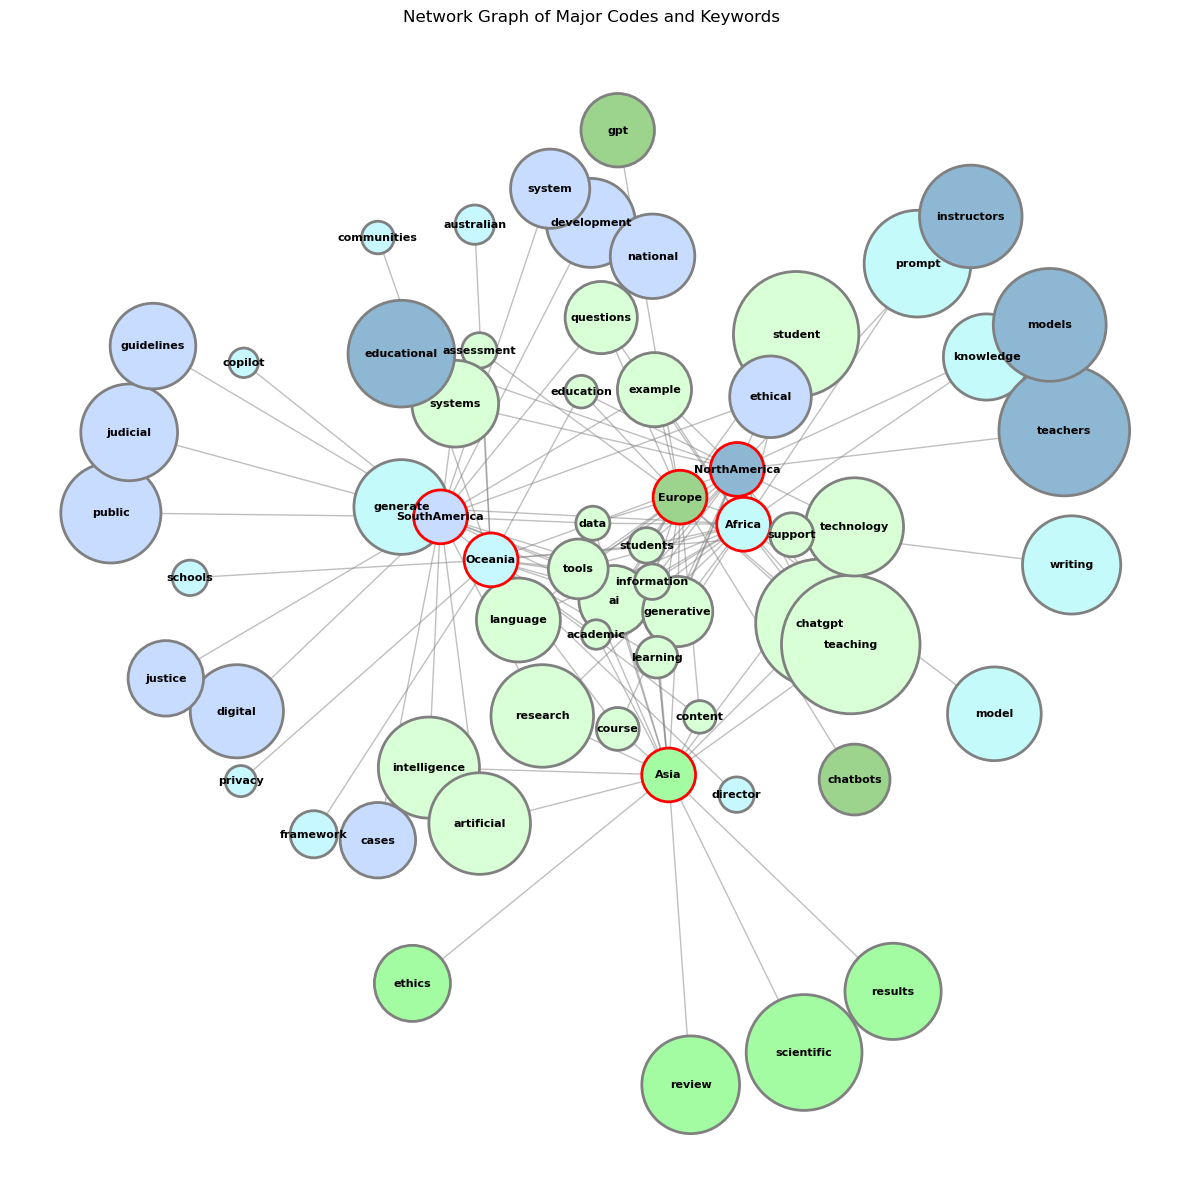

In [7]:
    import itertools
    import matplotlib.pyplot as plt
    import networkx as nx
    import matplotlib.colors as mcolors

    # Define a dictionary with specific colors for each continent
    continent_colors = {
        'Africa': '#c5fafa',  
        'Asia': '#a3fca2',    
        'Europe': '#9cd38d',  
        'NorthAmerica': '#8db7d3',  
        'SouthAmerica': '#c7dcff',  
        'Oceania': '#c7f7ff'  
    }

    # Function to plot the network graph
    def plot_network_graph(all_filtered_words):
        # Initialize a graph
        G = nx.Graph()

        # Define a base size for major and minor nodes
        major_node_base_size = 1500  # Increase size for major nodes
        minor_node_base_size = 50  # Adjust as needed

        # Add nodes and edges with sizes
        keyword_continent_map = {}
        for major_node, keywords in all_filtered_words.items():
            # Filter out stopwords
            filtered_keywords = [word for word in keywords if word not in all_stopwords]
            keyword_frequencies = Counter(filtered_keywords)
            top_keywords = keyword_frequencies.most_common(20)

            G.add_node(major_node, size=major_node_base_size, group=major_node)  # Add group attribute

            # Add all keywords as nodes and connect to the major node
            for keyword, frequency in top_keywords:
                keyword_size = frequency * minor_node_base_size
                G.add_node(keyword, size=keyword_size, group=major_node)  # Minor nodes have the same group as major
                G.add_edge(major_node, keyword)

                # Keep track of which continent each keyword belongs to
                if keyword in keyword_continent_map:
                    keyword_continent_map[keyword].add(major_node)
                else:
                    keyword_continent_map[keyword] = {major_node}

        # Node positions using spring layout
        pos = nx.spring_layout(G, k=0.5, scale=2)  # Adjust 'k' as needed

        # Draw the network
        plt.figure(figsize=(15, 15))

        # Draw the nodes using the size and group attributes for color
        node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
        node_colors = [continent_colors.get(G.nodes[node]['group'], '#d9d9d9') for node in G.nodes()]
        node_edge_colors = ['red' if node in all_filtered_words else 'gray' for node in G.nodes()]

        # Highlight overlapping nodes with a different color
        overlap_color = '#d8ffd6'
        for node in G.nodes():
            if len(keyword_continent_map.get(node, [])) > 1:
                node_colors[list(G.nodes()).index(node)] = overlap_color

        nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, edgecolors=node_edge_colors, linewidths=2)

        # Draw the edges
        nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

        # Draw the labels
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

        # Display the graph
        plt.title('Network Graph of Major Codes and Keywords')
        plt.axis('off')  # Turn off the axis
        plt.show()

    # Plot the network graph
    plot_network_graph(all_filtered_words)

**TESTING**

In [ ]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

# Dictionary to store all filtered words and their frequencies
all_filtered_words = {}

# Process each text file
for txt_file in txt_files:
    filtered_words = process_txt(txt_file)
    continent_name = txt_file.split('_')[1].replace('.txt', '')
    all_filtered_words[continent_name] = filtered_words

# Function to plot the network graph
def plot_network_graph(all_filtered_words):
    # Initialize a graph
    G = nx.Graph()

    # Define a base size for your major and minor nodes
    major_node_base_size = 1000  # Adjust as needed
    minor_node_base_size = 50  # Adjust as needed

    # Add nodes and edges with sizes
    for major_node, keywords in all_filtered_words.items():
        keyword_frequencies = Counter(keywords)
        top_keywords = keyword_frequencies.most_common(10)
        
        G.add_node(major_node, size=major_node_base_size, group=major_node)  # Add group attribute

        # Add all keywords as nodes and connect to the major node
        for keyword, frequency in top_keywords:
            keyword_size = frequency * minor_node_base_size
            G.add_node(keyword, size=keyword_size, group=major_node)  # Minor nodes have the same group as major
            G.add_edge(major_node, keyword)

        # Create edges between all pairs of minor nodes within the same group
        for keyword1, keyword2 in itertools.combinations([kw[0] for kw in top_keywords], 2):
            G.add_edge(keyword1, keyword2)

    # Node positions using spring layout
    pos = nx.spring_layout(G, k=0.5, scale=2)  # Adjust 'k' as needed

    # Draw the network
    plt.figure(figsize=(15, 15))

    # Create a color map that is unique for each group (major node)
    groups = set(nx.get_node_attributes(G, 'group').values())
    colors = list(mcolors.TABLEAU_COLORS)[:len(groups)]  # Adjust or replace with a different colormap if needed
    color_map = dict(zip(groups, colors))

    # Draw the nodes using the size and group attributes for color
    node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
    node_colors = [color_map[G.nodes[node]['group']] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, edgecolors='gjray')

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

    # Draw the labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

    # Display the graph
    plt.title('Network Graph of Major Codes and Keywords')
    plt.axis('off')  # Turn off the axis
    plt.show()

# Plot the network graph
plot_network_graph(all_filtered_words)